In [1]:
import numpy as np
import pandas as pd
from IPython.display import Image

In [2]:
male = [8,31,52,9,100]
female = [3,13,17,22,55]
total = [11,44,69,31,155]

# HR

In [3]:
human_resource = pd.DataFrame({'male':male,'female':female,'total':total},
                              index=['managerial','professional','technical','clerical','total'])

In [4]:
human_resource

,male,female,total
managerial,8,3,11
professional,31,13,44
technical,52,17,69
clerical,9,22,31
total,100,55,155


Suppose some legal concern has been expressed that adisproportionate number of managerial people at theclient company are men. If a worker is randomly selectedfrom the client company, what is the probability that theworker is a woman? If a managerial person is randomlyselected, what is the probability that the person is awoman? What factors might enter into the apparentdiscrepancy between probabilities?

In [7]:
#P(female)
round(55/155,2)*100

35.0

In [8]:
#P(female|managerial)
round(3/11,2)*100

27.0

Suppose a special bonus is being given to one person inthe technical area this year. If the bonus is randomlyawarded, what is the probability that it will go to awoman, given that worker is in the technical area? Is thisdiscrimination against male technical workers? Whatfactors might enter into the awarding of the bonus otherthan random selection?

In [9]:
#P(female|technical)
round(17/69,2)*100

25.0

In [10]:
#P(male|technical)
round(52/69,2)*100

75.0

Suppose that at the annual holiday party the name of anemployee of the client company will be drawn randomlyto win a trip to Hawaii. What is the probability that aprofessional person will be the winner?

In [16]:
#P(professional)
round(44/155,1)*100

30.0

What is the probability that the winner will be either aman or a clerical worker? What is the probability that thewinner will be a woman and in management? Suppose thewinner is a man. What is the probability that the winner isfrom the technical group, given that the winner is a man?

In [17]:
#P(male U clerical) = P(male) + P(clerical) - P(male and clerical)
round(100/155 + 31/155 - 9/155,2)*100

79.0

In [18]:
#P(female and managerial)
round(3/155,2)*100

2.0

In [19]:
#P(technical|male)
round(52/100,2)*100

52.0

# Questions

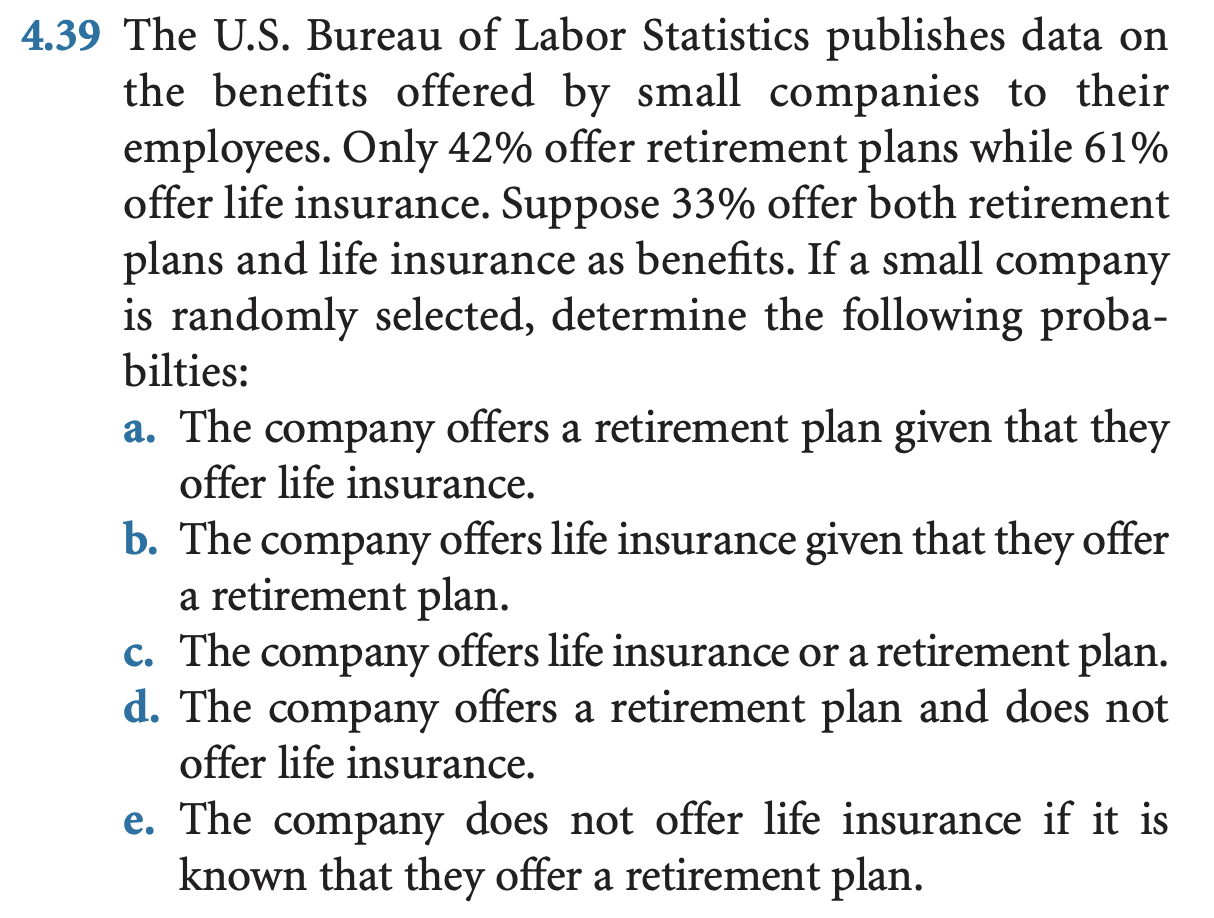

In [2]:
Image("./images/probability1.png")

In [5]:
joint_probability_table = pd.DataFrame([[0.33,0.28,0.61],[0.09,0.3,0.39],[0.42,0.58,1]],
                                       index=['Offer Life Insurance','Don\'t Offer Life Insurance','Total'],
                                       columns=['Offer Retirement Plans','Don\'t Offer Retirement Plans','Total'])

In [6]:
joint_probability_table

,Offer Retirement Plans,Don't Offer Retirement Plans,Total
Offer Life Insurance,0.33,0.28,0.61
Don't Offer Life Insurance,0.09,0.30,0.39
Total,0.42,0.58,1.00


In [8]:
# P(Offer Retirement Plans | Offer Life Insurance ) = P(Offer Retirement Plans and Offer Life Insurance ) / P(Offer Life Insurance)
round(0.33/0.61,4)

0.541

In [12]:
# P( Offer Life Insurance | Offer Retirement Plans  ) = P(Offer Retirement Plans AND Offer Life Insurance ) / P(Offer Retirement Plans)
round(0.33/0.42,4)

0.7857

In [13]:
# P(Offer Life Insurance OR Offer Retirement Plans)
0.09+0.28+0.33

0.7

In [14]:
#P(Offer Retirement Plans AND Don't Offer Life Insurance)
0.09

0.09

In [15]:
#P( Don't Offer Life Insurance | Offer Retirement Plans  ) = P(Offer Retirement Plans AND Don't Offer Life Insurance ) / P(Offer Retirement Plans)
round(0.09/0.42,4)

0.2143

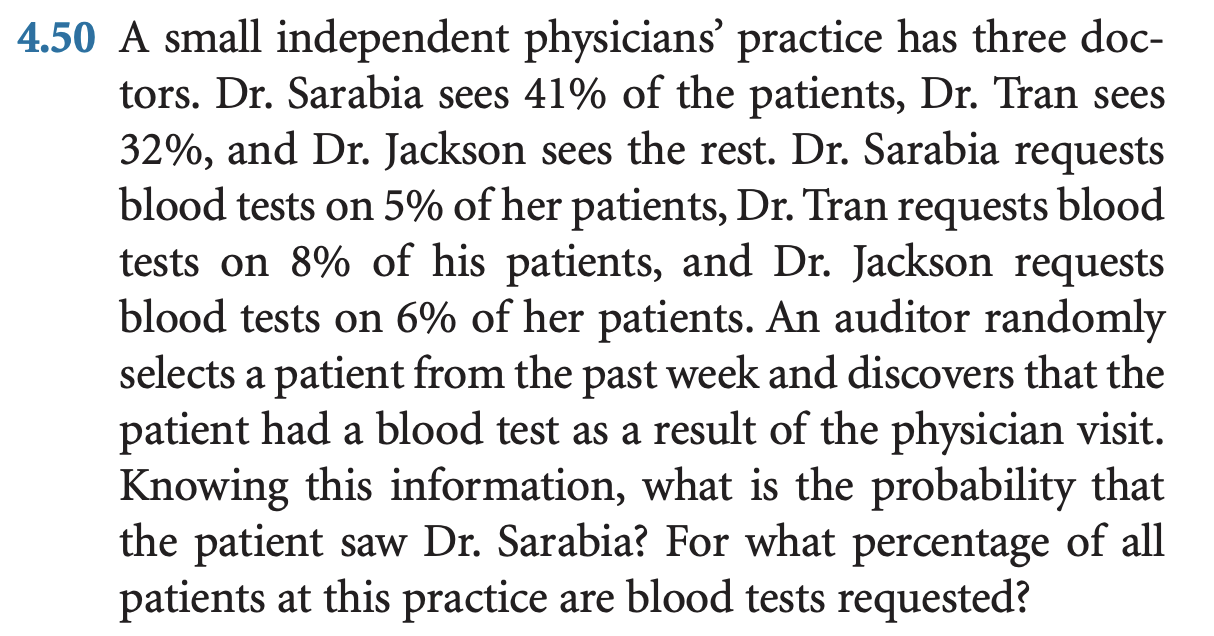

In [3]:
Image("./images/probability2.png")

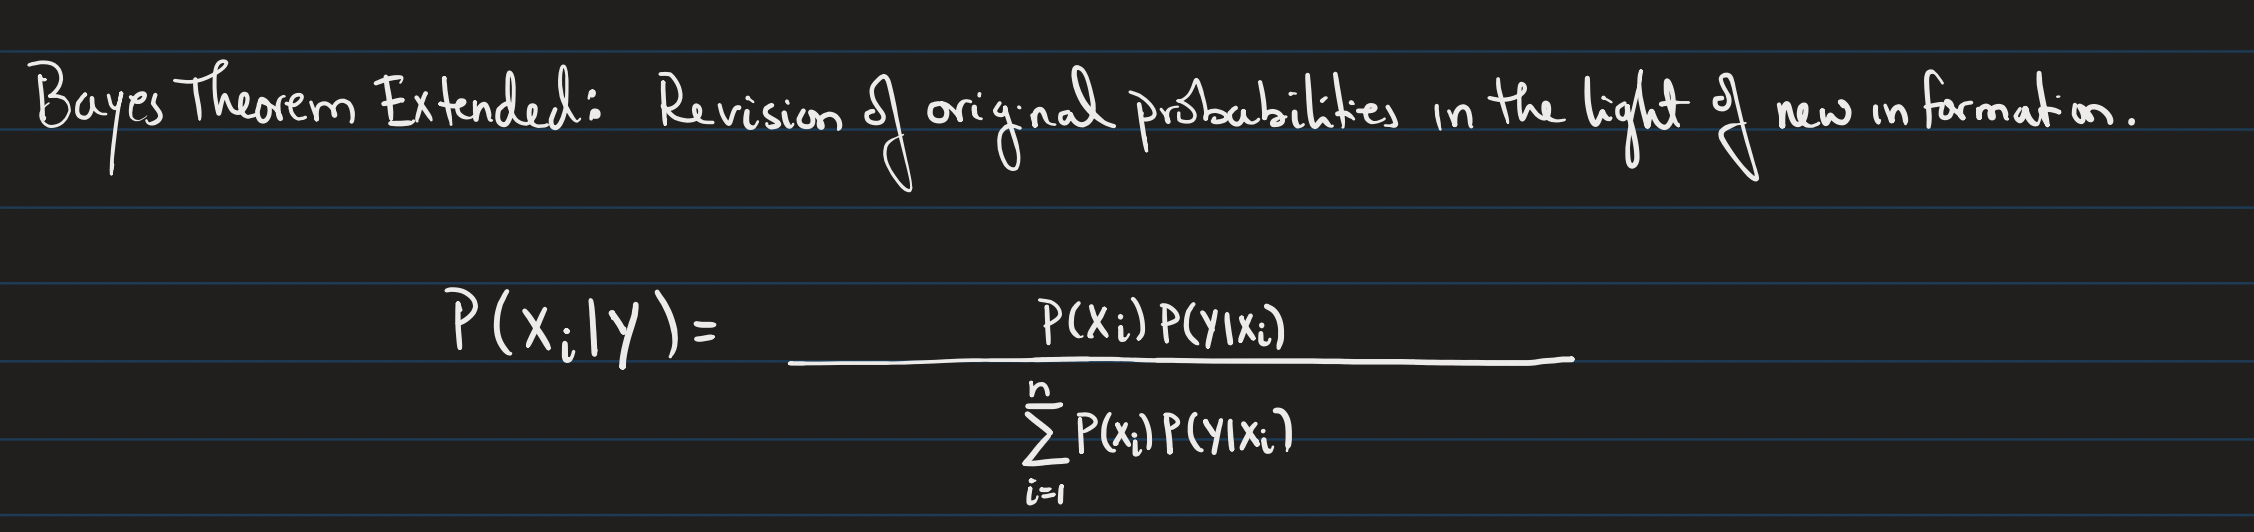

In [4]:
Image("./images/bayes-rule.png")

In [38]:
bayesian_table =pd.DataFrame(np.full((3,4),0,dtype=float),
             index=['Dr. Sarabia', 'Dr. Tran', 'Dr. Jackson'],
             columns=['Prior P(Doctor_i)','Conditional P(Requests Test| Doctor_i)',
                      'Joint P(Doctor_i AND Tests Requested)','Posterior P(Doctor_i | Had Blood Test)'])

In [39]:
bayesian_table.index.name = 'Event'

In [40]:
bayesian_table

,Prior P(Doctor_i),Conditional P(Requests Test| Doctor_i),Joint P(Doctor_i AND Tests Requested),Posterior P(Doctor_i | Had Blood Test)
Event,,,,
Dr. Sarabia,0.0,0.0,0.0,0.0
Dr. Tran,0.0,0.0,0.0,0.0
Dr. Jackson,0.0,0.0,0.0,0.0


In [41]:
# Prior
bayesian_table.iloc[0,0] = 0.41
bayesian_table.iloc[1,0] = 0.32
bayesian_table.iloc[2,0] = 0.27

In [42]:
# Conditional
bayesian_table.iloc[0,1] = 0.05
bayesian_table.iloc[1,1] = 0.08
bayesian_table.iloc[2,1] = 0.06

In [43]:
# joint
bayesian_table.iloc[:,2] = bayesian_table.iloc[:,0]*bayesian_table.iloc[:,1]

In [44]:
# P(Requests Tests)
pr_test_requested = bayesian_table.iloc[:,2].sum()

In [47]:
# posterior
bayesian_table.iloc[:,3] = round(bayesian_table.iloc[:,2]/pr_test_requested,3)

In [48]:
bayesian_table

,Prior P(Doctor_i),Conditional P(Requests Test| Doctor_i),Joint P(Doctor_i AND Tests Requested),Posterior P(Doctor_i | Had Blood Test)
Event,,,,
Dr. Sarabia,0.41,0.05,0.0205,0.329
Dr. Tran,0.32,0.08,0.0256,0.411
Dr. Jackson,0.27,0.06,0.0162,0.260
